# Traditional Value - Price to Book

In this notebook, we will focus on the "traditional value" metrics described in the Lo/Patel whitepaper.

[Reference](https://www.quantopian.com/lectures/case-study-traditional-value-factor)

Price to Book Value (Price to Book Ratio) is calculated as:

$$\text{P/B Ratio} = \frac{\text{Price}}{\text{Net Asset Value}}$$

Net Asset Value per share can be thought of (very roughly) as a company's total assets less its total liabilities, all divided by the number of shares outstanding.

The P/B Ratio gives a sense of a stock being either over- or undervalued. A high P/B ratio suggests that a stock's price is overvalued, and should therefore be shorted, whereas a low P/B ratio is attractive as the stock gained by purchasing the equity is hypothetically "worth more" than the price paid for it. 

We will now create a P/B Ratio custom factor and look at some of the results.

In [1]:
from quantopian.pipeline import Pipeline
from quantopian.research import run_pipeline
from quantopian.pipeline.factors import CustomFactor
from quantopian.pipeline.data import morningstar
from quantopian.pipeline.filters.morningstar import Q1500US

In [2]:
class Price_to_Book(CustomFactor):

    inputs = [morningstar.valuation_ratios.pb_ratio]
    window_length = 1

    def compute(self, today, assets, out, pbr):
        out[:] = pbr[-1]
        
# Custom Factor 1 : Dividend Yield
class Div_Yield(CustomFactor):

    inputs = [morningstar.valuation_ratios.dividend_yield]
    window_length = 1

    def compute(self, today, assets, out, d_y):
        out[:] = d_y[-1]

        
        
def make_pipeline():
    
    pipe = Pipeline(
        columns={
            'pbr': Price_to_Book(),
        },
        screen=Q1500US()

    )

    return pipe

In [3]:
result = run_pipeline(make_pipeline(), start_date='2013-12-01', end_date='2014-12-01')

In [4]:
result.head()

pbr
2013-12-02 00:00:00+00:00 Equity(2 [ARNC])   0.8030
                          Equity(24 [AAPL])  4.0502
                          Equity(41 [ARCB])  1.6756
                          Equity(62 [ABT])   2.4919
                          Equity(67 [ADSK])  4.7214

In [5]:
result.columns

Index([u'pbr'], dtype='object')

In [6]:
result.mean(level=0)

,pbr
2013-12-02 00:00:00+00:00,16.260967
2013-12-03 00:00:00+00:00,16.260967
2013-12-04 00:00:00+00:00,16.260967
2013-12-05 00:00:00+00:00,16.269069
2013-12-06 00:00:00+00:00,16.269822
2013-12-09 00:00:00+00:00,16.278960
2013-12-10 00:00:00+00:00,16.278960
2013-12-11 00:00:00+00:00,16.278960
2013-12-12 00:00:00+00:00,16.278960
2013-12-13 00:00:00+00:00,16.278960


In [7]:
tmp = result.copy()

In [8]:
tmp = tmp.reset_index()
tmp.head()

,level_0,level_1,pbr
0,2013-12-02 00:00:00+00:00,Equity(2 [ARNC]),0.8030
1,2013-12-02 00:00:00+00:00,Equity(24 [AAPL]),4.0502
2,2013-12-02 00:00:00+00:00,Equity(41 [ARCB]),1.6756
3,2013-12-02 00:00:00+00:00,Equity(62 [ABT]),2.4919
4,2013-12-02 00:00:00+00:00,Equity(67 [ADSK]),4.7214


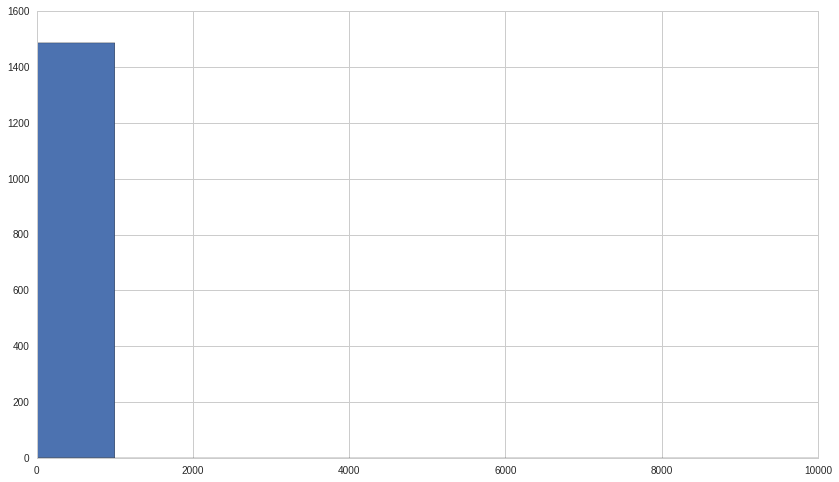

In [9]:
tmp[tmp.level_0 == '2013-12-02']['pbr'].hist();

In [10]:
res = tmp[tmp.level_0 == '2013-12-02']['pbr']

In [11]:
res.dropna().describe()

count     1490.000000
mean        16.260967
std        269.804449
min          0.292300
25%          1.752450
50%          2.870650
75%          4.962225
max      10000.000000
Name: pbr, dtype: float64

***

In [12]:
assets = result.index.levels[1].unique()

In [13]:
pricing = get_pricing(assets, start_date='2013-12-01', end_date='2015-02-01', fields='open_price')

In [14]:
import alphalens

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: This function is deprecated and will be removed in the future. Please use the new API instead.
  after removing the cwd from sys.path.


Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,0.140492,1.283900,0.948787,0.196332,37409,10.033634
2,1.093927,1.717000,1.401524,0.126254,37252,9.991524
3,1.479522,2.166400,1.811795,0.137913,37281,9.999303
4,1.838042,2.606900,2.227925,0.141105,37250,9.990988
5,2.245690,3.174600,2.701457,0.177410,37302,10.004935
6,2.712206,3.728600,3.253422,0.183373,37255,9.992329
7,3.277145,4.664200,3.936705,0.272065,37228,9.985087
8,4.123363,6.311702,5.095236,0.455542,37255,9.992329
9,5.344816,11.261300,7.610048,1.284353,37256,9.992597


Returns Analysis


,5,10,20
Ann. alpha,0.007,-0.008,-0.024
beta,-0.004,0.009,0.008
Mean Period Wise Return Top Quantile (bps),-1.837,-7.796,-21.632
Mean Period Wise Return Bottom Quantile (bps),-22.481,-49.125,-97.102
Mean Period Wise Spread (bps),4.156,4.166,3.763


/usr/local/lib/python2.7/dist-packages/alphalens/plotting.py:727: FutureWarning: pd.rolling_apply is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,min_periods=1,window=5).apply(args=<tuple>,func=<function>,kwargs=<dict>)
  min_periods=1, args=(period,))
/usr/local/lib/python2.7/dist-packages/alphalens/plotting.py:767: FutureWarning: pd.rolling_apply is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,min_periods=1,window=5).apply(args=<tuple>,func=<function>,kwargs=<dict>)
  min_periods=1, args=(period,))
/usr/local/lib/python2.7/dist-packages/alphalens/plotting.py:727: FutureWarning: pd.rolling_apply is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,min_periods=1,window=10).apply(args=<tuple>,func=<function>,kwargs=<dict>)
  min_periods=1, args=(period,))
/usr/local/lib/python2.7/dist-packages/alphalens/pl

Information Analysis


,5,10,20
IC Mean,0.002,0.003,0.005
IC Std.,0.113,0.122,0.135
t-stat(IC),0.239,0.345,0.581
p-value(IC),0.811,0.730,0.562
IC Skew,-0.810,-1.070,-1.351
IC Kurtosis,1.036,1.073,1.298
Ann. IR,0.239,0.345,0.581


/usr/local/lib/python2.7/dist-packages/alphalens/plotting.py:215: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=22,center=False).mean()
  pd.rolling_mean(ic, 22).plot(ax=a,


Turnover Analysis


,5,10,20
Quantile 1 Mean Turnover,0.034,0.057,0.100
Quantile 2 Mean Turnover,0.072,0.118,0.202
Quantile 3 Mean Turnover,0.090,0.150,0.255
Quantile 4 Mean Turnover,0.099,0.165,0.284
Quantile 5 Mean Turnover,0.100,0.165,0.284
Quantile 6 Mean Turnover,0.106,0.175,0.296
Quantile 7 Mean Turnover,0.099,0.167,0.284
Quantile 8 Mean Turnover,0.084,0.140,0.240
Quantile 9 Mean Turnover,0.062,0.106,0.184
Quantile 10 Mean Turnover,0.028,0.049,0.090


,5,10,20
Mean Factor Rank Autocorrelation,0.997,0.995,0.99


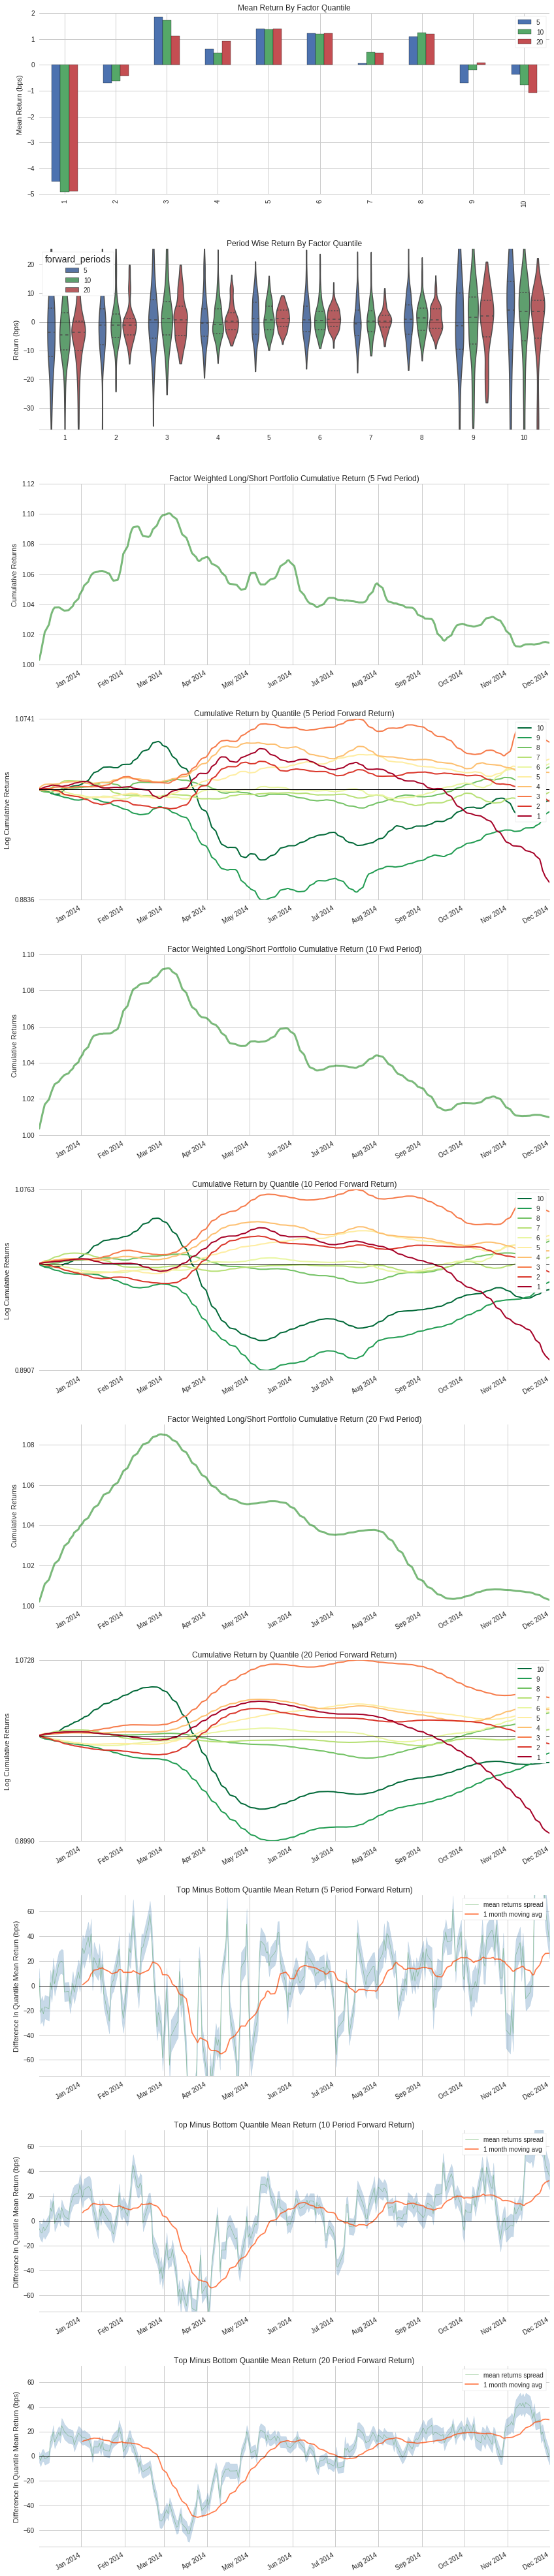

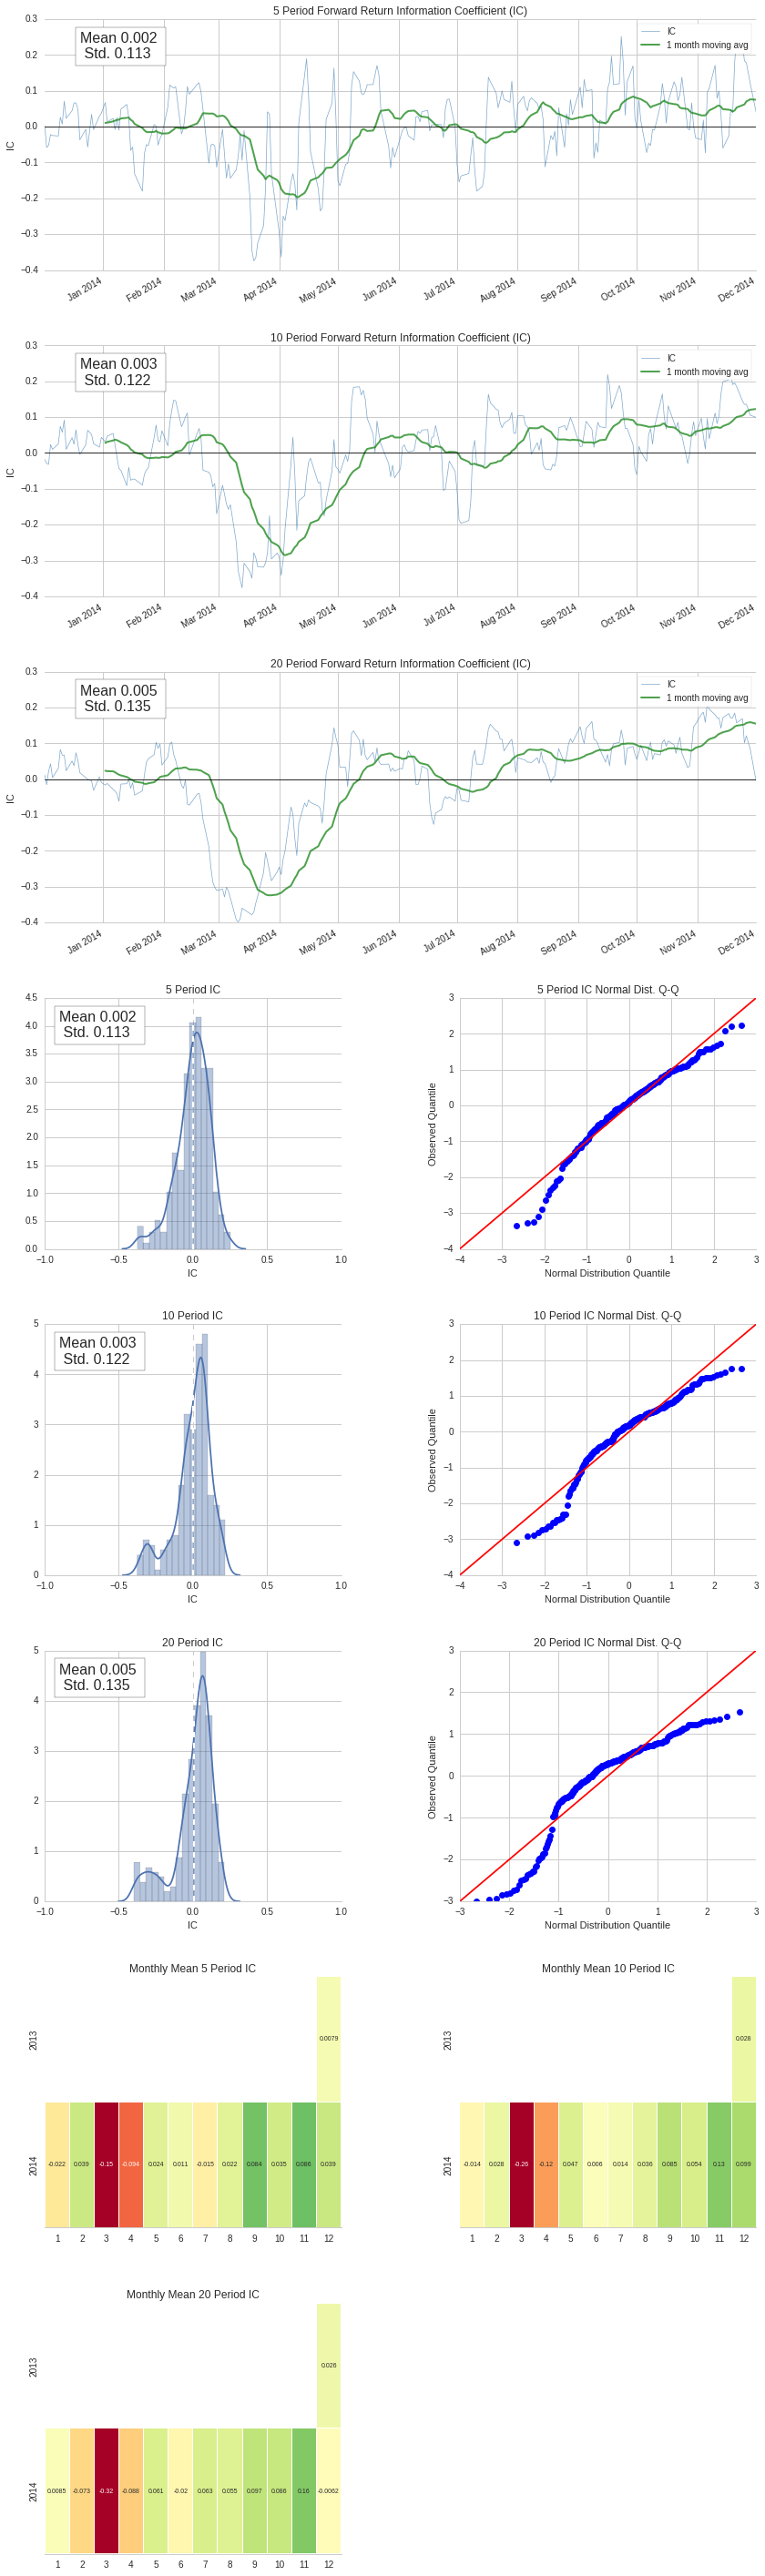

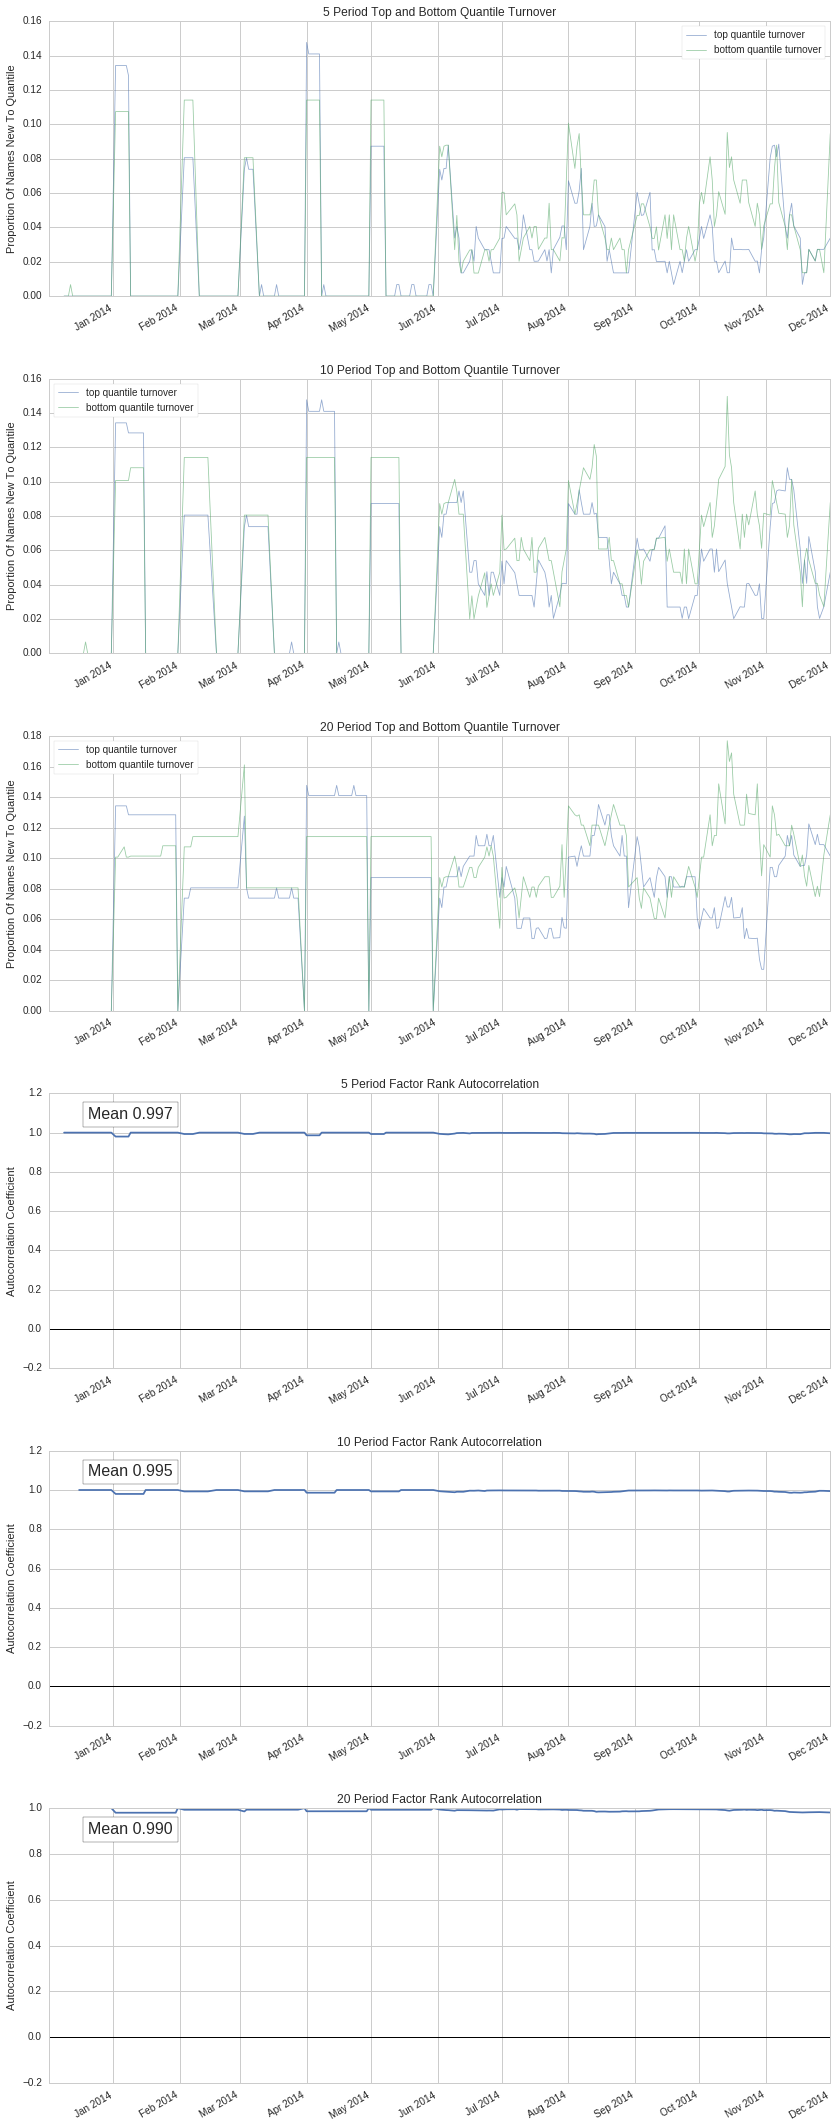

In [15]:
alphalens.tears.create_factor_tear_sheet(factor=result['pbr'],
                                         prices=pricing,
                                         quantiles=10,
                                         periods=(5,10,20))

***